In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set date range for the data (last 2 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

print(f"Fetching NVIDIA stock data from {start_date.date()} to {end_date.date()}")

# Fetch NVIDIA stock data
nvda = yf.download('NVDA', start=start_date, end=end_date)

# Display basic information
print(f"\nDownloaded {len(nvda)} days of NVIDIA stock data")
print(f"Date range: {nvda.index.min().date()} to {nvda.index.max().date()}\n")

# Display the first few rows
print("First 5 rows of data:")
print(nvda.head())


Fetching NVIDIA stock data from 2024-04-01 to 2025-04-01
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Downloaded 251 days of NVIDIA stock data
Date range: 2024-04-01 to 2025-03-31

First 5 rows of data:
Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2024-04-01  90.333313  92.194701  89.174697  90.269339  452441000
2024-04-02  89.422615  90.064402  87.591216  88.418939  433064000
2024-04-03  88.934776  90.344317  88.370966  88.454938  370067000
2024-04-04  85.876778  90.604228  85.851784  90.376298  434965000
2024-04-05  87.979095  88.451940  85.897779  86.837465  399678000


Price chart saved as nvda_price_chart.png


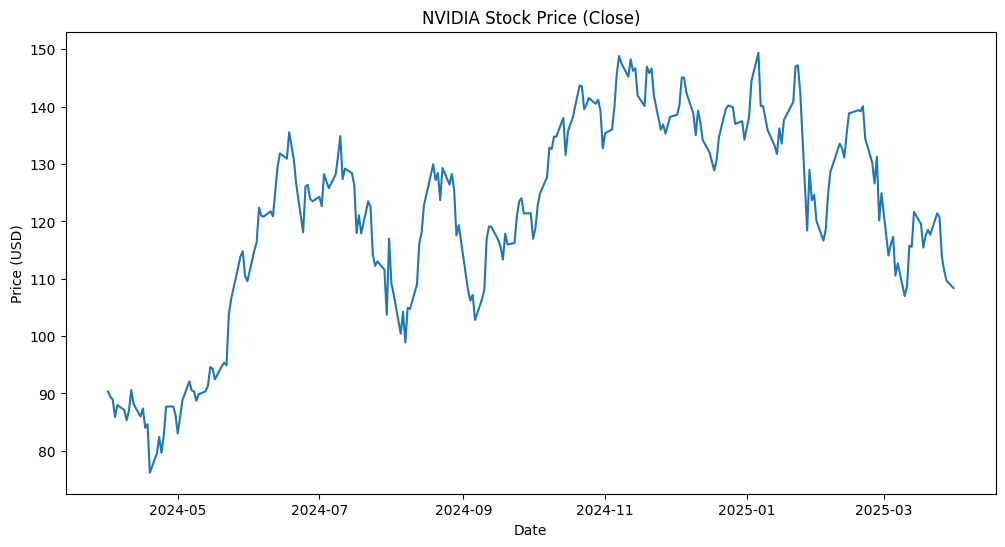

In [2]:
plt.figure(figsize=(12, 6))
plt.plot(nvda.index, nvda['Close'])
plt.title('NVIDIA Stock Price (Close)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(False)
plt.savefig('nvda_price_chart.png')
plt.show()


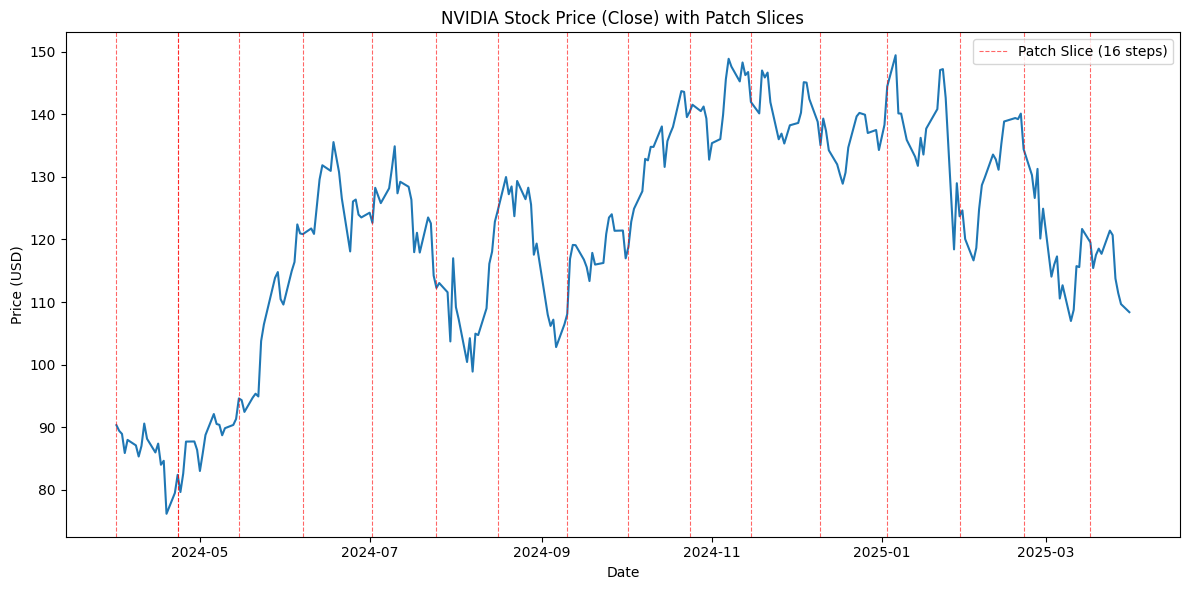

In [7]:
plt.figure(figsize=(12, 6))

# Plot the stock data
plt.plot(nvda.index, nvda['Close'])

# Add vertical patch lines every 16 time steps
for i in range(0, len(nvda), 16):
    if i < len(nvda):
        plt.axvline(x=nvda.index[i], color='red', linestyle='--', alpha=0.6, linewidth=0.8)

# Add one labeled line for the legend
plt.axvline(x=nvda.index[16] if len(nvda) > 16 else nvda.index[0], 
            color='red', linestyle='--', alpha=0.6, linewidth=0.8, 
            label='Patch Slice (16 steps)')

plt.title('NVIDIA Stock Price (Close) with Patch Slices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.savefig('nvda_price_chart_patches.png')
plt.show()

In [8]:
# Function to create separate images for each patch
def create_patch_images(data, series_col='Close', patch_size=16, output_dir='patches'):
    import os
    import matplotlib.pyplot as plt
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Calculate number of patches
    num_patches = len(data) // patch_size
    
    # Create separate image for each patch
    for i in range(num_patches):
        # Get start and end indices for this patch
        start_idx = i * patch_size
        end_idx = start_idx + patch_size
        
        # Skip if we don't have enough data for a full patch
        if end_idx >= len(data):
            break
            
        # Extract data for this patch
        patch_data = data.iloc[start_idx:end_idx]
        
        # Create figure for this patch
        plt.figure(figsize=(8, 4))
        plt.plot(patch_data.index, patch_data[series_col])
        
        # Add patch information
        plt.title(f'Patch {i+1}: {patch_data.index[0].date()} to {patch_data.index[-1].date()}')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.grid(False)
        
        # Optional: Add vertical line at the beginning and end of patch
        plt.axvline(x=patch_data.index[0], color='gray', linestyle='--', alpha=0.5)
        plt.axvline(x=patch_data.index[-1], color='gray', linestyle='--', alpha=0.5)
        
        # Make sure dates are displayed properly
        plt.tight_layout()
        
        # Save the figure
        plt.savefig(f'{output_dir}/patch_{i+1:03d}.png')
        plt.close()  # Close to free memory
    
    print(f"Created {num_patches} patch images in '{output_dir}' directory")

# Using the function with your NVDA data
create_patch_images(nvda, patch_size=16, output_dir='nvda_patches')

Created 15 patch images in 'nvda_patches' directory


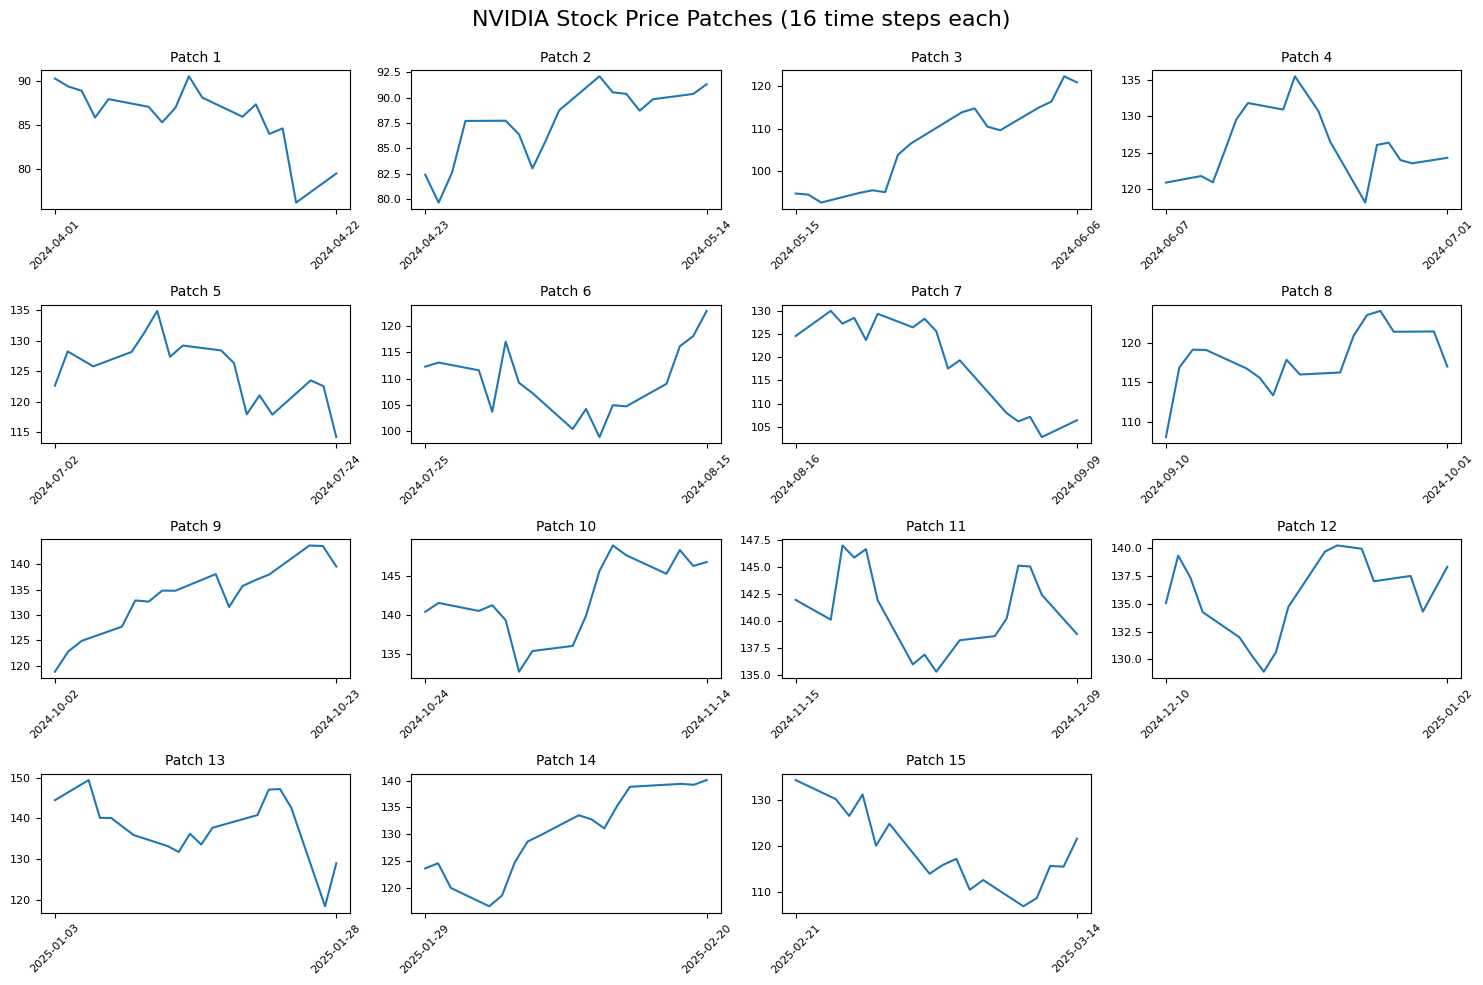

In [11]:
def plot_patches_grid(data, series_col='Close', patch_size=16, figsize=(15, 10)):
    import matplotlib.pyplot as plt
    import math
    
    # Calculate number of patches
    num_patches = len(data) // patch_size
    
    # Determine grid dimensions
    # Try to make it roughly square-ish
    grid_cols = math.ceil(math.sqrt(num_patches))
    grid_rows = math.ceil(num_patches / grid_cols)
    
    # Create figure and subplots
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=figsize)
    
    # Flatten axes array for easy indexing
    if grid_rows > 1 and grid_cols > 1:
        axes = axes.flatten()
    elif grid_rows == 1:
        axes = [axes] if grid_cols == 1 else axes
    elif grid_cols == 1:
        axes = [axes] if grid_rows == 1 else axes
    
    # Global y-limits for consistent scaling (optional)
    # y_min = data[series_col].min() * 0.95
    # y_max = data[series_col].max() * 1.05
    
    # Plot each patch
    for i in range(num_patches):
        # Get start and end indices for this patch
        start_idx = i * patch_size
        end_idx = start_idx + patch_size
        
        # Skip if we don't have enough data for a full patch
        if end_idx > len(data):
            break
            
        # Extract data for this patch
        patch_data = data.iloc[start_idx:end_idx]
        
        # Plot on the corresponding subplot
        axes[i].plot(patch_data.index, patch_data[series_col])
        
        # Set title and format
        axes[i].set_title(f'Patch {i+1}', fontsize=10)
        
        # Format dates nicely - show only first and last date
        axes[i].set_xticks([patch_data.index[0], patch_data.index[-1]])
        axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)
        
        # # Optionally use consistent y-scale
        # axes[i].set_ylim(y_min, y_max)
        
        # Remove grid
        axes[i].grid(False)
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    # Add overall title and adjust layout
    fig.suptitle('NVIDIA Stock Price Patches (16 time steps each)', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Make room for suptitle
    
    return fig

# Create the grid of patches
fig = plot_patches_grid(nvda, patch_size=16, figsize=(15, 10))
plt.show()

In [11]:
# Visualize the patch embeddings
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt

# Step 1: Extract the closing prices and convert to numpy array
close_prices = nvda['Close'].values

# Step 2: Create patches of length 16
patch_size = 16
num_complete_patches = len(close_prices) // patch_size

# Create the patches (reshape data into segments of 16)
patches = []
for i in range(num_complete_patches):
    start_idx = i * patch_size
    end_idx = start_idx + patch_size
    patch = close_prices[start_idx:end_idx]
    patches.append(patch)

# Convert to numpy array for easier manipulation
patches = np.array(patches)
patches = patches.squeeze()
print(f"Created {len(patches)} patches of length {patch_size}")
print(f"Patches shape: {patches.shape}")  # Should be (num_patches, 16)

# Step 3: Create a random projection matrix for the linear projection
# The projection matrix should be (16, 256) for matrix multiplication to work
np.random.seed(42)  # For reproducibility
projection_matrix = np.random.randn(16, 256)  # Make sure dimensions match
print(f"Projection matrix shape: {projection_matrix.shape}")

# Step 4: Project each patch to 256 dimensions
# Matrix multiplication: (num_patches, 16) × (16, 256) = (num_patches, 256)
# Reshape patches if needed
if len(patches.shape) == 1:
    patches = patches.reshape(-1, patch_size)
print(f"Reshaped patches shape: {patches.shape}")

projected_patches = np.matmul(patches, projection_matrix)
print(f"Projected patches shape: {projected_patches.shape}")  # Should be (num_patches, 256)

# Print the first patch (16 time steps)
print("Original Patch (16 time steps):")
print(patches[0])
print("\nShape:", patches[0].shape)

# Print a small portion of the projection matrix
print("\nProjection Matrix (showing first 16 time steps → first 5 dimensions):")
print(projection_matrix[:, :5])  # Show just first 5 columns for clarity
print("\nFull projection matrix shape:", projection_matrix.shape)

# Print the first few dimensions of the resulting embedding
print("\nResulting Embedding:")
print(projected_patches[0])
print("\nFull embedding shape:", projected_patches[0].shape)

# Option 1: Using numpy's set_printoptions
np.set_printoptions(precision=2, suppress=True, linewidth=100)
print("Original Patch as Matrix:")
print(patches[0].reshape(-1, 1))  # Reshape to column vector

# Option 2: Using pandas DataFrame (often clearest)
print("\nOriginal Patch as DataFrame:")
patch_df = pd.DataFrame(patches[0], columns=['Price'])
print(patch_df)

# Option 3: For the projection, show small subset as DataFrame
print("\nProjection Matrix (first 5 columns):")
proj_df = pd.DataFrame(projection_matrix[:, :5], 
                      index=[f'time_{i+1}' for i in range(16)],
                      columns=[f'dim_{i+1}' for i in range(5)])
print(proj_df)

# Option 4: Show resulting embedding
print("\nEmbedding (first 20 dimensions):")
embed_df = pd.DataFrame(projected_patches[0, :20].reshape(1, -1),
                       columns=[f'dim_{i+1}' for i in range(20)])
print(embed_df)

Created 15 patches of length 16
Patches shape: (15, 16)
Projection matrix shape: (16, 256)
Reshaped patches shape: (15, 16)
Projected patches shape: (15, 256)
Original Patch (16 time steps):
[90.33 89.42 88.93 85.88 87.98 87.1  85.33 87.01 90.59 88.16 85.97 87.39 84.01 84.64 76.17 79.49]

Shape: (16,)

Projection Matrix (showing first 16 time steps → first 5 dimensions):
[[ 0.5  -0.14  0.65  1.52 -0.23]
 [ 1.27 -0.71  0.44  0.77 -0.93]
 [-0.24 -0.91 -0.58  0.76  0.5 ]
 [-0.63  1.81  0.71 -0.56  0.63]
 [ 1.73  0.44  0.04  0.12  0.61]
 [ 0.13 -0.15  0.71  0.96 -0.79]
 [ 0.51 -0.53 -1.17 -2.87 -0.03]
 [-0.16  0.67  0.21 -0.75 -0.32]
 [-0.33  0.16  0.83 -0.87 -0.66]
 [ 2.    3.11  0.61 -0.18  0.53]
 [-1.01  0.09 -0.93  0.26 -0.9 ]
 [ 0.48  0.37  0.39 -1.93 -0.28]
 [ 0.2   1.63 -0.73  1.82  0.78]
 [-1.09  0.83  0.91 -1.55  1.59]
 [ 0.07 -1.29 -0.7  -0.92  1.24]
 [-0.61 -0.71  0.98 -1.37  1.61]]

Full projection matrix shape: (16, 256)

Resulting Embedding:
[ 258.91  417.83  215.09 -389.17  

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


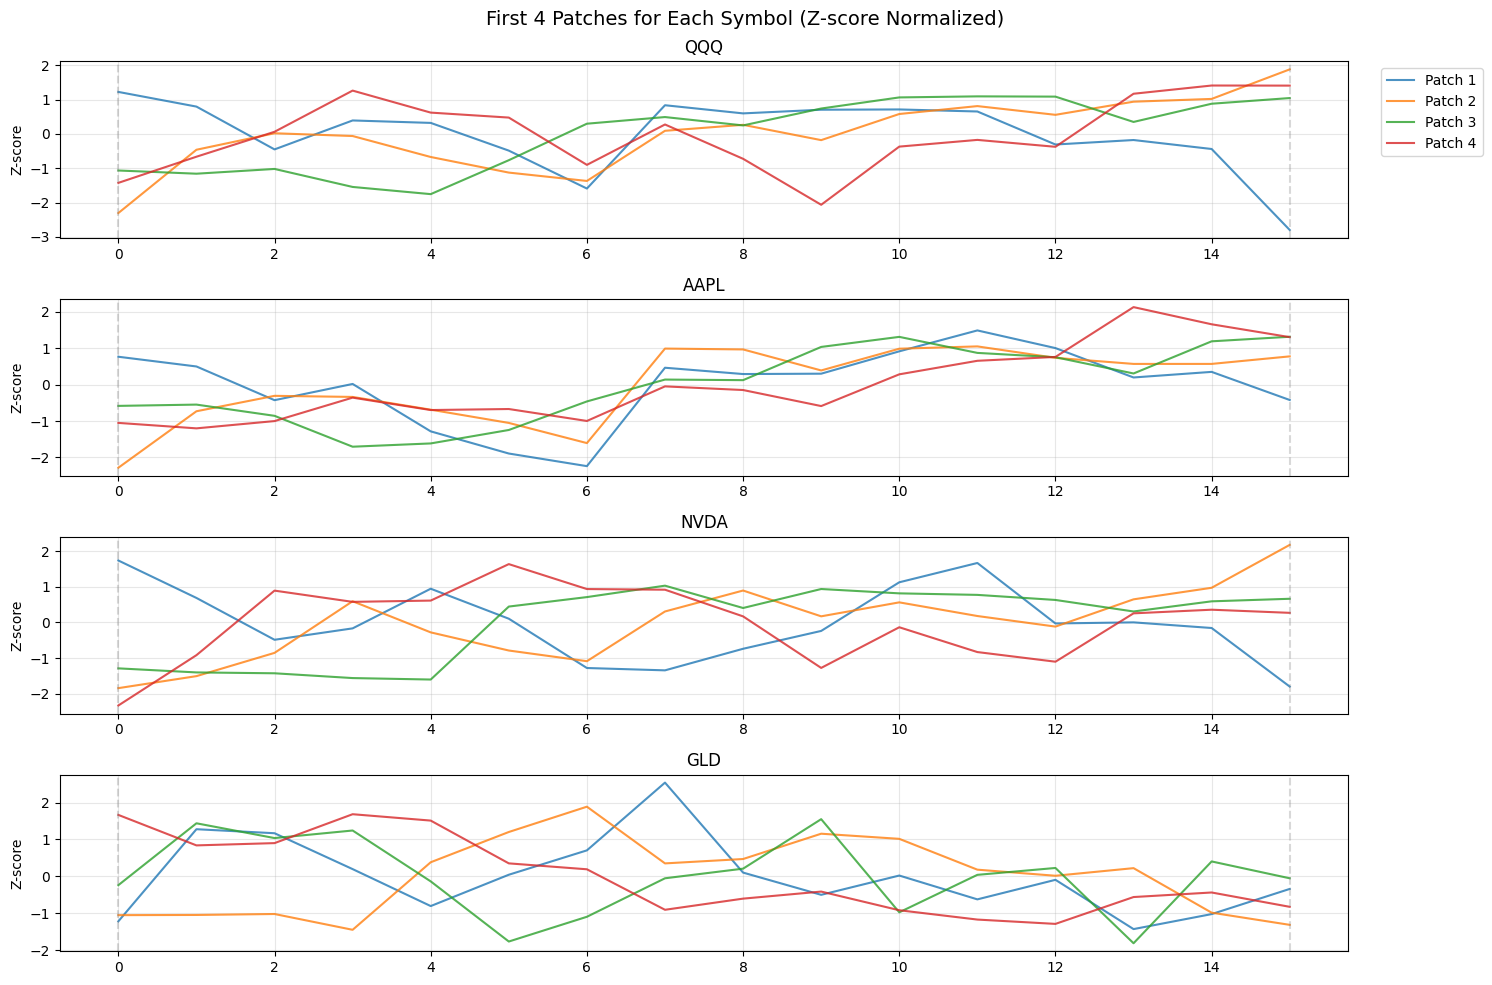


QQQ Patches Statistics:
Patch 1: Mean = 0.00, Std = 1.00
Patch 2: Mean = -0.00, Std = 1.00
Patch 3: Mean = -0.00, Std = 1.00
Patch 4: Mean = -0.00, Std = 1.00

AAPL Patches Statistics:
Patch 1: Mean = 0.00, Std = 1.00
Patch 2: Mean = 0.00, Std = 1.00
Patch 3: Mean = -0.00, Std = 1.00
Patch 4: Mean = 0.00, Std = 1.00

NVDA Patches Statistics:
Patch 1: Mean = 0.00, Std = 1.00
Patch 2: Mean = -0.00, Std = 1.00
Patch 3: Mean = 0.00, Std = 1.00
Patch 4: Mean = -0.00, Std = 1.00

GLD Patches Statistics:
Patch 1: Mean = -0.00, Std = 1.00
Patch 2: Mean = -0.00, Std = 1.00
Patch 3: Mean = 0.00, Std = 1.00
Patch 4: Mean = 0.00, Std = 1.00


In [1]:
# Pull multiple symboles to show time and pair wise relationships
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set date range (2 years of data)
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

# Fetch data for all symbols
symbols = ['QQQ', 'AAPL', 'NVDA', 'GLD']
data = {}
for symbol in symbols:
    data[symbol] = yf.download(symbol, start=start_date, end=end_date)['Close']

# Create patches for each symbol
patch_size = 16
patches = {}
for symbol in symbols:
    prices = data[symbol].values
    num_complete_patches = len(prices) // patch_size
    symbol_patches = []
    
    # Take first 4 patches for each symbol
    for i in range(min(4, num_complete_patches)):
        start_idx = i * patch_size
        end_idx = start_idx + patch_size
        patch = prices[start_idx:end_idx]
        # Normalize each patch to make them comparable
        patch = (patch - patch.mean()) / patch.std()
        symbol_patches.append(patch)
    
    patches[symbol] = np.array(symbol_patches)

# Create visualization
fig, axes = plt.subplots(len(symbols), 1, figsize=(15, 10))
fig.suptitle('First 4 Patches for Each Symbol (Z-score Normalized)', fontsize=14)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Different color for each patch

for idx, (symbol, symbol_patches) in enumerate(patches.items()):
    for patch_idx in range(len(symbol_patches)):
        axes[idx].plot(symbol_patches[patch_idx], 
                      color=colors[patch_idx], 
                      alpha=0.8,
                      label=f'Patch {patch_idx+1}')
    
    axes[idx].set_title(f'{symbol}', fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylabel('Z-score')
    
    if idx == 0:  # Only show legend for the first subplot
        axes[idx].legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    
    # Add vertical lines to show patch boundaries
    axes[idx].axvline(x=0, color='gray', linestyle='--', alpha=0.3)
    axes[idx].axvline(x=15, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics
for symbol in symbols:
    print(f"\n{symbol} Patches Statistics:")
    for i, patch in enumerate(patches[symbol]):
        print(f"Patch {i+1}: Mean = {patch.mean():.2f}, Std = {patch.std():.2f}")

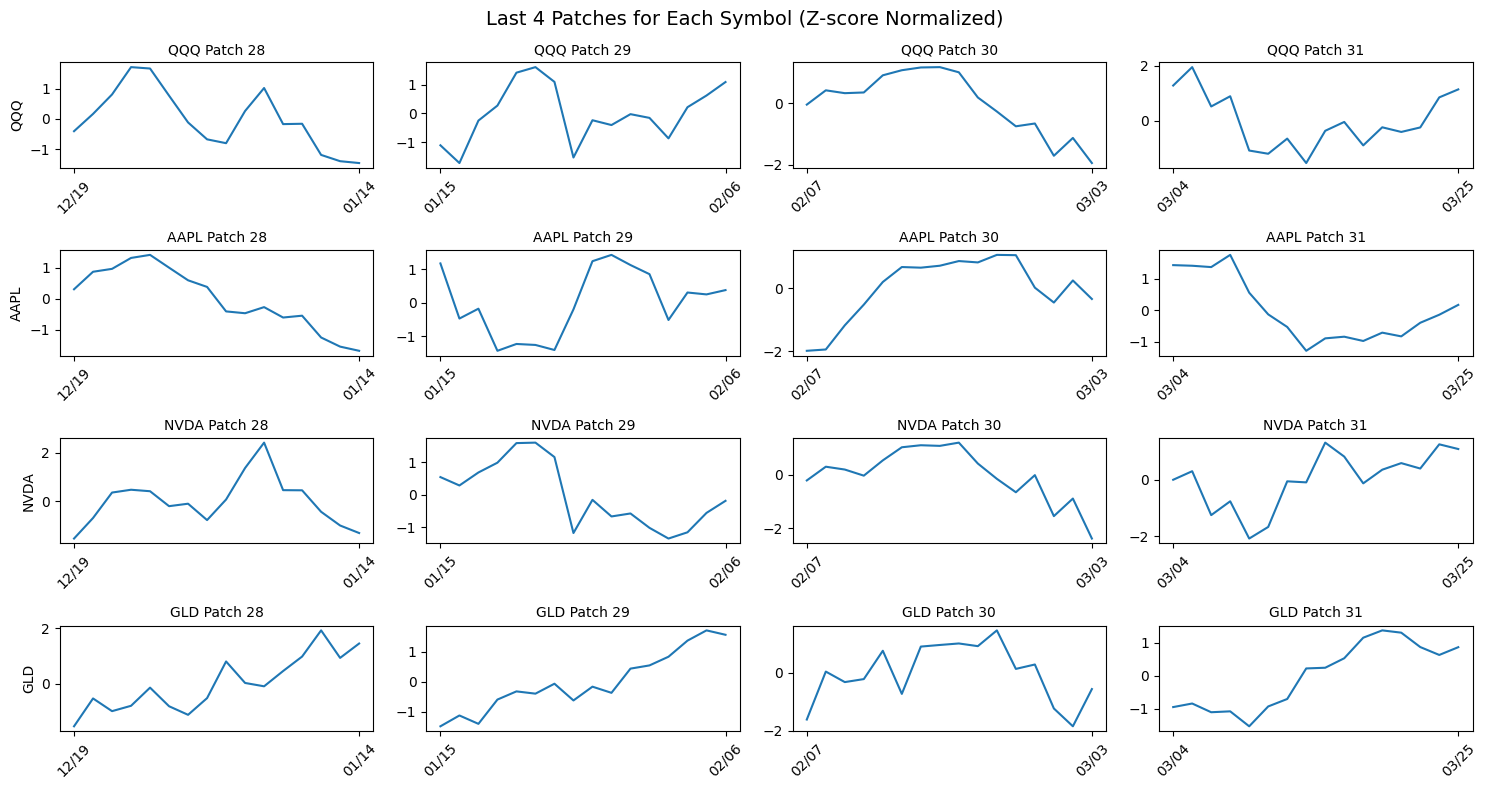

In [5]:
def plot_symbol_patches_grid(symbols_data, patch_size=16, num_patches=4, figsize=(15, 8)):
    """
    Plot the last num_patches patches for each symbol in a grid where each row is a symbol
    
    Args:
        symbols_data: dict with symbol names as keys and pandas DataFrames as values
        patch_size: number of timesteps in each patch
        num_patches: number of last patches to show for each symbol
        figsize: size of the figure
    """
    import matplotlib.pyplot as plt
    
    num_symbols = len(symbols_data)
    
    # Create figure and subplots - one row per symbol, num_patches columns
    fig, axes = plt.subplots(num_symbols, num_patches, figsize=figsize)
    
    # For each symbol
    for sym_idx, (symbol, data) in enumerate(symbols_data.items()):
        close_prices = data
        
        # Calculate total number of complete patches
        total_patches = len(close_prices) // patch_size
        
        # Calculate starting patch index to get last num_patches
        start_patch = max(0, total_patches - num_patches)
        
        # For each of the last num_patches
        for patch_idx in range(start_patch, total_patches):
            # Calculate array position
            grid_pos = patch_idx - start_patch
            
            # Get patch data
            start_idx = patch_idx * patch_size
            end_idx = start_idx + patch_size
            patch_data = close_prices.iloc[start_idx:end_idx]
            
            # Normalize patch data for better comparison
            normalized_data = (patch_data - patch_data.mean()) / patch_data.std()
            
            # Plot on corresponding subplot
            ax = axes[sym_idx, grid_pos]
            ax.plot(range(patch_size), normalized_data)
            
            # Add title and format
            ax.set_title(f'{symbol} Patch {patch_idx+1}', fontsize=10)
            
            # Remove grid
            ax.grid(False)
            
            # Only show y-label for leftmost plots
            if grid_pos == 0:
                ax.set_ylabel(symbol)
            
            # Clean up x-axis
            ax.set_xticks([0, patch_size-1])
            ax.set_xticklabels([patch_data.index[0].strftime('%m/%d'), 
                              patch_data.index[-1].strftime('%m/%d')],
                              rotation=45)
    
    plt.suptitle('Last 4 Patches for Each Symbol (Z-score Normalized)', fontsize=14)
    plt.tight_layout()
    return fig

fig = plot_symbol_patches_grid(data)
plt.show()

In [4]:
data['QQQ']

Ticker,QQQ
Date,
2023-04-03,316.092834
2023-04-04,315.026489
2023-04-05,311.916443
2023-04-06,314.019409
2023-04-10,313.841644
...,...
2025-03-26,484.380005
2025-03-27,481.619995
2025-03-28,468.940002
